<a href="https://colab.research.google.com/github/gustavolio/GPSm/blob/main/Reddit_Posts_Privacy_Preserving_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Configuração dos experimentos

Dado um dataset, construir um grafo e fazer um ataque NO GRAFO que seria disponibilizado publicamente.

In [ ]:
import networkx as nx
import pandas as pd

In [ ]:
!pip install scikit-network

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 73.8 MB/s eta 0:00:00


In [ ]:
!gdown --id 1UDov2JOlbv9YQBigoPA_w2TxzIytukI5
df = pd.read_excel('/content/reddit_posts_dataset_privacy_data_labeled.xlsx')

def categorize_age(age):
    if age < 18:
        return '<18'
    else:
        return '>=18'

df['age'] = df['age'].apply(categorize_age)
df

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UDov2JOlbv9YQBigoPA_w2TxzIytukI5
To: /content/reddit_posts_dataset_privacy_data_labeled.xlsx
100% 4.56M/4.56M [00:00<00:00, 30.9MB/s]


,created_utc,submission_id,selftext,selftext_anon,sex,age,utility_label
0,1667598849,ymbm4c,"First, if there are some errors, it's because ...","First, if there are some errors, it's because ...",M,<18,Friendship
1,1667247632,yinqpo,Sorry its my first time posting and this is a ...,Sorry its my first time posting and this is a ...,F,<18,Relationships
2,1670086770,zbktcs,I (13F) have divorced parents. On Friday my da...,I have divorced parents. On Friday my dad too...,F,<18,Divorce
3,1675946741,10xtvuf,I (13F) was playing a video game with a focus ...,I was playing a video game with a focus on ou...,F,<18,Dating
4,1676244820,110tm9k,I (13F) live with my dad (43M) and brother (11...,I live with my dad and brother . I like my b...,F,<18,Boundaries
...,...,...,...,...,...,...,...
4629,1671454844,zpqyfy,"Me (61M) and my three kids- A (22M), B (20M) a...","Me and my three kids- A , B and C are all o...",M,>=18,Parenting
4630,1673643109,10b56lm,I (64M) live in a townhome that is part of a c...,I live in a townhome that is part of a condo ...,M,>=18,Roommates
4631,1691518196,15lpone,"Sorry if I format this wrong, I've never poste...","Sorry if I format this wrong, I've never poste...",F,>=18,Boundaries
4632,1682125000,12up5sj,"I (66M) have four kids , Jake (40m) , Lisa (32...","I have four kids , Jake , Lisa , Frank and ...",M,>=18,Divorce


In [ ]:
selected_classes = ['Divorce', 'Boundaries', 'Pregnancy', 'Workplace']
df = df[df['utility_label'].isin(selected_classes)]
df

,created_utc,submission_id,selftext,selftext_anon,sex,age,utility_label
2,1670086770,zbktcs,I (13F) have divorced parents. On Friday my da...,I have divorced parents. On Friday my dad too...,F,<18,Divorce
4,1676244820,110tm9k,I (13F) live with my dad (43M) and brother (11...,I live with my dad and brother . I like my b...,F,<18,Boundaries
5,1686819227,149x9o7,My mom (38) is planning to have a baby with he...,My mom is planning to have a baby with her ne...,F,<18,Pregnancy
6,1699905814,17ujesx,Last December my mom and stepdad lost custody ...,Last December my mom and stepdad lost custody ...,F,<18,Divorce
11,1691199071,15ii9su,My aunt tried forcing me to share my bed and I...,My aunt tried forcing me to share my bed and I...,M,<18,Boundaries
...,...,...,...,...,...,...,...
4619,1682368143,12xv9s0,I am asking here because a friend told me to.\...,I am asking here because a friend told me to.\...,F,>=18,Boundaries
4627,1671353908,zoua0u,"My father (87) has, until recently, lived with...","My father has, until recently, lived with my ...",F,>=18,Boundaries
4628,1684441094,13l9mqk,I (61F) have 3 children and 4 grandchildren. M...,I have 3 children and 4 grandchildren. My old...,F,>=18,Divorce
4631,1691518196,15lpone,"Sorry if I format this wrong, I've never poste...","Sorry if I format this wrong, I've never poste...",F,>=18,Boundaries


<Axes: >

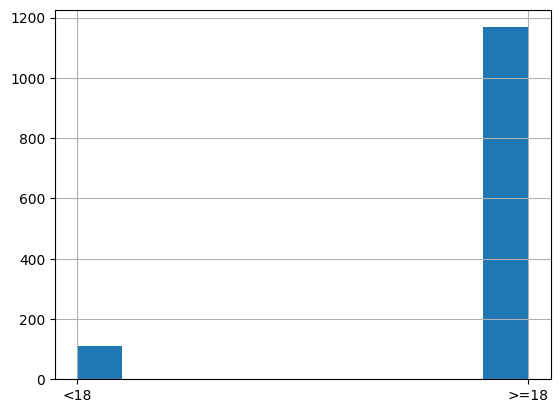

In [ ]:
df.age.hist()

In [ ]:
df['utility_label'].unique()

array(['Divorce', 'Boundaries', 'Pregnancy', 'Workplace'], dtype=object)

In [ ]:
df['utility_label'].value_counts()

,count
utility_label,
Boundaries,571
Divorce,327
Workplace,201
Pregnancy,180


In [ ]:
df

,created_utc,submission_id,selftext,selftext_anon,sex,age,utility_label
2,1670086770,zbktcs,I (13F) have divorced parents. On Friday my da...,I have divorced parents. On Friday my dad too...,F,<18,Divorce
4,1676244820,110tm9k,I (13F) live with my dad (43M) and brother (11...,I live with my dad and brother . I like my b...,F,<18,Boundaries
5,1686819227,149x9o7,My mom (38) is planning to have a baby with he...,My mom is planning to have a baby with her ne...,F,<18,Pregnancy
6,1699905814,17ujesx,Last December my mom and stepdad lost custody ...,Last December my mom and stepdad lost custody ...,F,<18,Divorce
11,1691199071,15ii9su,My aunt tried forcing me to share my bed and I...,My aunt tried forcing me to share my bed and I...,M,<18,Boundaries
...,...,...,...,...,...,...,...
4619,1682368143,12xv9s0,I am asking here because a friend told me to.\...,I am asking here because a friend told me to.\...,F,>=18,Boundaries
4627,1671353908,zoua0u,"My father (87) has, until recently, lived with...","My father has, until recently, lived with my ...",F,>=18,Boundaries
4628,1684441094,13l9mqk,I (61F) have 3 children and 4 grandchildren. M...,I have 3 children and 4 grandchildren. My old...,F,>=18,Divorce
4631,1691518196,15lpone,"Sorry if I format this wrong, I've never poste...","Sorry if I format this wrong, I've never poste...",F,>=18,Boundaries


In [ ]:
df.groupby('utility_label').count()[['age']]

,age
utility_label,
Boundaries,571
Divorce,327
Pregnancy,180
Workplace,201


<Axes: >

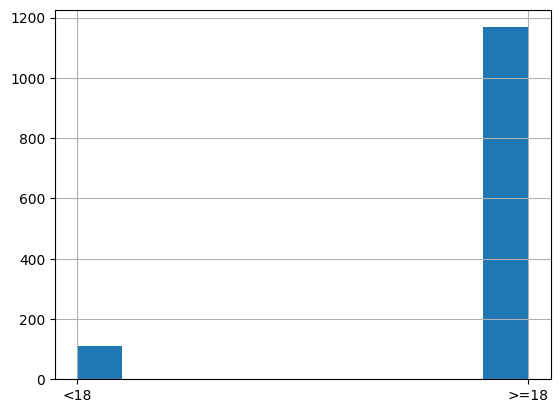

In [ ]:
df.age.hist()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]

    # Remove punctuation
    words = [word.translate(str.maketrans('', '', string.punctuation)) for word in words]

    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

df['selftext_preprocess'] = df['selftext'].apply(preprocess_text)
df['selftext_anon_preprocess'] = df['selftext_anon'].apply(preprocess_text)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-12-46eb4c91dc6e>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selftext_preprocess'] = df['selftext'].apply(preprocess_text)
<ipython-input-12-46eb4c91dc6e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selftext_anon_preprocess'] = df['selftext_anon'].apply(preprocess_text)


,created_utc,submission_id,selftext,selftext_anon,sex,age,utility_label,selftext_preprocess,selftext_anon_preprocess
2,1670086770,zbktcs,I (13F) have divorced parents. On Friday my da...,I have divorced parents. On Friday my dad too...,F,<18,Divorce,13f divorc parent friday dad took get eye test...,divorc parent friday dad took get eye test nee...
4,1676244820,110tm9k,I (13F) live with my dad (43M) and brother (11...,I live with my dad and brother . I like my b...,F,<18,Boundaries,13f live dad 43m brother 11m like brother use ...,live dad brother like brother use play togeth...
5,1686819227,149x9o7,My mom (38) is planning to have a baby with he...,My mom is planning to have a baby with her ne...,F,<18,Pregnancy,mom 38 plan babi new boyfriend two month learn...,mom plan babi new boyfriend two month learn to...
6,1699905814,17ujesx,Last December my mom and stepdad lost custody ...,Last December my mom and stepdad lost custody ...,F,<18,Divorce,last decemb mom stepdad lost custodi 13f steph...,last decemb mom stepdad lost custodi stephalf ...
11,1691199071,15ii9su,My aunt tried forcing me to share my bed and I...,My aunt tried forcing me to share my bed and I...,M,<18,Boundaries,aunt tri forc share bed refus so littl backsto...,aunt tri forc share bed refus so littl backsto...
...,...,...,...,...,...,...,...,...,...
4619,1682368143,12xv9s0,I am asking here because a friend told me to.\...,I am asking here because a friend told me to.\...,F,>=18,Boundaries,ask friend told to daughter 31f wife 33f son 5...,ask friend told to daughter wife son live dif...
4627,1671353908,zoua0u,"My father (87) has, until recently, lived with...","My father has, until recently, lived with my ...",F,>=18,Boundaries,father 87 ha recent live husband 60 61f becam ...,father ha recent live husband becam disabl he...
4628,1684441094,13l9mqk,I (61F) have 3 children and 4 grandchildren. M...,I have 3 children and 4 grandchildren. My old...,F,>=18,Divorce,61f 3 children 4 grandchildren oldest son who’...,3 children 4 grandchildren oldest son who’ div...
4631,1691518196,15lpone,"Sorry if I format this wrong, I've never poste...","Sorry if I format this wrong, I've never poste...",F,>=18,Boundaries,sorri format wrong ive never post reddit befor...,sorri format wrong ive never post reddit befor...


In [ ]:
# Encode comments using tfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['selftext_preprocess'])
X.shape

(1279, 10253)

In [ ]:
# Count the number of terms
from collections import defaultdict

# Get feature names and their corresponding tf-idf values
feature_names = vectorizer.get_feature_names_out()
tfidf_values = X.toarray()

# Create a dictionary to store word frequencies
word_frequencies = defaultdict(float)

# Iterate through documents and update word frequencies
for doc_tfidf in tfidf_values:
    for i, tfidf_score in enumerate(doc_tfidf):
        if tfidf_score > 0:  # Consider only words with non-zero tf-idf
            word_frequencies[feature_names[i]] += tfidf_score

# Sort word frequencies in descending order
sorted_word_frequencies = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True))
sorted_word_frequencies
df_sorted = pd.DataFrame(list(sorted_word_frequencies.items()), columns=['term', 'frequency'])
#df_sorted[df_sorted['frequency']>20]

In [ ]:
df_sorted

,term,frequency
0,mom,44.389292
1,want,42.830605
2,told,42.763607
3,said,42.317554
4,go,37.663748
...,...,...
10248,cannotther,0.037897
10249,doessh,0.037897
10250,lawsuit,0.037897
10251,slumberparti,0.037897


In [ ]:
# Sort word frequencies in descending order
ATTACKER_TEST_SIZE = 0.9
UTILITY_TEST_SIZE = 0.3
RANDOM_STATE = 42
PRIVATE_ATT_COLUMN = 'sex'
PRIVATE_ATT2_COLUMN = 'age'

In [ ]:
import pandas as pd
import numpy as np

!mkdir -p results_folder
!mkdir -p results_folder/confusion_matrices
df.to_csv('results_folder/dataset_reddit_posts.csv', index=False)

y = df['utility_label'].to_list()

y_privado = df[PRIVATE_ATT_COLUMN].to_list()
y_privado2 = df[PRIVATE_ATT2_COLUMN].to_list()

#### Combina y_privados para rodar o experimento 3 ####
def create_label(row):
    return f"{row[PRIVATE_ATT_COLUMN]}_{row[PRIVATE_ATT2_COLUMN]}"
df['y_privado_combined'] = df.apply(create_label, axis=1)

y_privado_combined = df['y_privado_combined'].to_list()
del df['y_privado_combined']

print(X.shape)
df

(1279, 10253)


<ipython-input-17-9ffd86e0597a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_privado_combined'] = df.apply(create_label, axis=1)


,created_utc,submission_id,selftext,selftext_anon,sex,age,utility_label,selftext_preprocess,selftext_anon_preprocess
2,1670086770,zbktcs,I (13F) have divorced parents. On Friday my da...,I have divorced parents. On Friday my dad too...,F,<18,Divorce,13f divorc parent friday dad took get eye test...,divorc parent friday dad took get eye test nee...
4,1676244820,110tm9k,I (13F) live with my dad (43M) and brother (11...,I live with my dad and brother . I like my b...,F,<18,Boundaries,13f live dad 43m brother 11m like brother use ...,live dad brother like brother use play togeth...
5,1686819227,149x9o7,My mom (38) is planning to have a baby with he...,My mom is planning to have a baby with her ne...,F,<18,Pregnancy,mom 38 plan babi new boyfriend two month learn...,mom plan babi new boyfriend two month learn to...
6,1699905814,17ujesx,Last December my mom and stepdad lost custody ...,Last December my mom and stepdad lost custody ...,F,<18,Divorce,last decemb mom stepdad lost custodi 13f steph...,last decemb mom stepdad lost custodi stephalf ...
11,1691199071,15ii9su,My aunt tried forcing me to share my bed and I...,My aunt tried forcing me to share my bed and I...,M,<18,Boundaries,aunt tri forc share bed refus so littl backsto...,aunt tri forc share bed refus so littl backsto...
...,...,...,...,...,...,...,...,...,...
4619,1682368143,12xv9s0,I am asking here because a friend told me to.\...,I am asking here because a friend told me to.\...,F,>=18,Boundaries,ask friend told to daughter 31f wife 33f son 5...,ask friend told to daughter wife son live dif...
4627,1671353908,zoua0u,"My father (87) has, until recently, lived with...","My father has, until recently, lived with my ...",F,>=18,Boundaries,father 87 ha recent live husband 60 61f becam ...,father ha recent live husband becam disabl he...
4628,1684441094,13l9mqk,I (61F) have 3 children and 4 grandchildren. M...,I have 3 children and 4 grandchildren. My old...,F,>=18,Divorce,61f 3 children 4 grandchildren oldest son who’...,3 children 4 grandchildren oldest son who’ div...
4631,1691518196,15lpone,"Sorry if I format this wrong, I've never poste...","Sorry if I format this wrong, I've never poste...",F,>=18,Boundaries,sorri format wrong ive never post reddit befor...,sorri format wrong ive never post reddit befor...


In [ ]:
# from sklearn.feature_selection import chi2
# from sklearn.datasets import load_iris
# from sklearn.preprocessing import MaxAbsScaler

# # Normalizar os dados para garantir valores positivos (chi2 requer valores >= 0)
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=2)

# X = vectorizer.fit_transform(df['selftext_preprocess'])

# scaler = MaxAbsScaler ()
# X_scaled = scaler.fit_transform(X)

# # Criar DataFrame de resultados
# df_results = pd.DataFrame(columns=["feature", "importancia_chi2", "classe"])

# # Aplicar chi2 para cada classe separadamente (one-vs-rest)
# for classe in set(y_privado_combined):  # Para cada classe única
#     y_bin = [1 if label == classe else 0 for label in y_privado_combined]  # One-vs-rest
#     chi2_scores, _ = chi2(X_scaled, y_bin)  # Calcula chi2

#     # Criar DataFrame para essa classe
#     df_classe = pd.DataFrame({
#         "feature": vectorizer.get_feature_names_out(),
#         "importancia_chi2": chi2_scores,
#         "classe": classe
#     })

#     # Adicionar ao DataFrame principal
#     df_results = pd.concat([df_results, df_classe], ignore_index=True)

# # Ordenar por importância
# df_results = df_results.sort_values(by=["classe", "importancia_chi2"], ascending=[True, False])

# # Exibir resultados
# df_results.to_excel('ranking_features.xlsx')


In [ ]:
# !pip install sentence-transformers umap-learn matplotlib pandas

In [ ]:
# import pandas as pd
# import numpy as np
# import networkx as nx
# import matplotlib.pyplot as plt
# from sentence_transformers import SentenceTransformer
# from sklearn.neighbors import NearestNeighbors
# from textwrap import fill  # Para quebrar o texto em várias linhas

# # Exemplo de DataFrame (substitua pelo seu)
# df = pd.read_csv('/content/implicit explicit feature.csv')
# df.columns = ['feature', 'type']

# # Carregar modelo SBERT
# model = SentenceTransformer("all-MiniLM-L6-v2")

# # Gerar embeddings
# embeddings = model.encode(df["feature"].tolist(), convert_to_numpy=True)

# # Criar grafo kNN (k vizinhos mais próximos)
# k = 15  # Número de vizinhos (ajuste conforme necessário)
# nbrs = NearestNeighbors(n_neighbors=k+1, metric="cosine").fit(embeddings)  # +1 pois inclui o próprio nó
# distances, indices = nbrs.kneighbors(embeddings)

# # Criar a matriz de adjacência
# adj_matrix = np.zeros((len(df), len(df)))

# # Preencher a matriz de adjacência com base nos vizinhos mais próximos
# for i in range(len(df)):
#     for j in indices[i][1:]:  # Ignora o primeiro índice (ele mesmo)
#         adj_matrix[i, j] = 1
#         adj_matrix[j, i] = 1  # Grafo não direcionado

# # Criar o grafo a partir da matriz de adjacência
# G = nx.from_numpy_array(adj_matrix)

# # Adicionar atributos de tipo aos nós
# node_types = {i: df["type"][i] for i in range(len(df))}  # Mapeando os índices para os tipos
# nx.set_node_attributes(G, node_types, "type")

# # Plotando o grafo com cores baseadas no tipo (type)
# plt.figure(figsize=(14, 12))

# # Definir as cores baseadas no "type"
# colors = {"Implicit feature": "lightgreen", "Explicit feature": "lightblue"}

# # Atribuindo cores aos nós com base no tipo
# node_color = [colors[G.nodes[node]["type"]] for node in G.nodes()]

# # Desenhar o grafo
# pos = nx.spring_layout(G, seed=42)  # Layout para o grafo
# nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=800, alpha=0.7)  # Aumentar o tamanho dos nós
# nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color="gray")

# # Adicionar rótulos aos nós (nomes das features) com quebra de linha
# labels = {i: fill(df["feature"][i], width=10) for i in range(len(df))}  # Quebra o texto em linhas de até 10 caracteres
# nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color="black", font_weight="bold")

# # Exibir o título e a legenda
# plt.axis("off")
# plt.show()

In [ ]:
df

,created_utc,submission_id,selftext,selftext_anon,sex,age,utility_label,selftext_preprocess,selftext_anon_preprocess
2,1670086770,zbktcs,I (13F) have divorced parents. On Friday my da...,I have divorced parents. On Friday my dad too...,F,<18,Divorce,13f divorc parent friday dad took get eye test...,divorc parent friday dad took get eye test nee...
4,1676244820,110tm9k,I (13F) live with my dad (43M) and brother (11...,I live with my dad and brother . I like my b...,F,<18,Boundaries,13f live dad 43m brother 11m like brother use ...,live dad brother like brother use play togeth...
5,1686819227,149x9o7,My mom (38) is planning to have a baby with he...,My mom is planning to have a baby with her ne...,F,<18,Pregnancy,mom 38 plan babi new boyfriend two month learn...,mom plan babi new boyfriend two month learn to...
6,1699905814,17ujesx,Last December my mom and stepdad lost custody ...,Last December my mom and stepdad lost custody ...,F,<18,Divorce,last decemb mom stepdad lost custodi 13f steph...,last decemb mom stepdad lost custodi stephalf ...
11,1691199071,15ii9su,My aunt tried forcing me to share my bed and I...,My aunt tried forcing me to share my bed and I...,M,<18,Boundaries,aunt tri forc share bed refus so littl backsto...,aunt tri forc share bed refus so littl backsto...
...,...,...,...,...,...,...,...,...,...
4619,1682368143,12xv9s0,I am asking here because a friend told me to.\...,I am asking here because a friend told me to.\...,F,>=18,Boundaries,ask friend told to daughter 31f wife 33f son 5...,ask friend told to daughter wife son live dif...
4627,1671353908,zoua0u,"My father (87) has, until recently, lived with...","My father has, until recently, lived with my ...",F,>=18,Boundaries,father 87 ha recent live husband 60 61f becam ...,father ha recent live husband becam disabl he...
4628,1684441094,13l9mqk,I (61F) have 3 children and 4 grandchildren. M...,I have 3 children and 4 grandchildren. My old...,F,>=18,Divorce,61f 3 children 4 grandchildren oldest son who’...,3 children 4 grandchildren oldest son who’ div...
4631,1691518196,15lpone,"Sorry if I format this wrong, I've never poste...","Sorry if I format this wrong, I've never poste...",F,>=18,Boundaries,sorri format wrong ive never post reddit befor...,sorri format wrong ive never post reddit befor...


In [ ]:
sel_features_total = set()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

best_utility_features = SelectFromModel(estimator=LinearSVC()).fit(X, y)

features_in = vectorizer.get_feature_names_out()
features_out = best_utility_features.get_support()
for c in range(len(features_in)):
  if features_out[c]==True:
    print(features_in[c])
    sel_features_total.add(features_in[c])

10
100
1030pm
10f
10th
1145
11f
11x
11yearold
12
125
12f
13
14
140
14m
14th
15
1500
15f
15m
16
160
16m
16th
17
17f
18
180
1820
18f
18hr
18m
19f
19m
1h
1k
1st
20
200
2000
2019
2020
2021
2022
2023
2024
20f
20m
20yo
21f
21st
220
22f
22m
23f
23m
23x
2400
24f
24m
25
2587
25f
25m
26f
26m
27
27f
27m
27th
28
28f
28m
29
29f
29m
2f
2h
2hr
2m
2nd
2yearold
3040f
30f
30m
31
31f
32f
32m
33f
33m
34
35
35m
36m
37
37f
37m
38
38f
38m
39
39m
3f
3mo
3pm
3x
40
400
40000
40f
40m
40th
41m
42f
43f
44f
44m
45
450
45f
45m
46m
48
48m
49
4f
50
500
5050
50f
510
52
54f
55f
56f
57
5k10k
60
62m
63f
65f
69f
6f
6yearold
75
7m
820
8am
8f
8m
90000
90k
9am
aaron
aba
aback
abandon
abbi
abil
abl
ableist
abort
about
absenc
absolut
abundantli
abus
accept
access
accid
accident
accommod
accord
account
ach
achiev
acknowledg
acquaint
across
action
actual
ad
adam
add
addict
addit
admin
admit
admittedli
adopt
ador
adrian
adrianna
adult
advanc
advantag
adventur
advic
advis
advoc
affair
affect
affection
afraid
again
against
agent
agg

In [ ]:
from sklearn.linear_model import LogisticRegression
best_utility_features = SelectFromModel(estimator=LinearSVC()).fit(X, y_privado)

features_in = vectorizer.get_feature_names_out()
features_out = best_utility_features.get_support()
for c in range(len(features_in)):
  if features_out[c]==True:
    print(features_in[c])
    sel_features_total.add(features_in[c])

03
0m
10
10m
10pm
10th
1130
11f
11m
1200
125
12m
12yo
13
130pm
13f
13yo
14
140
14m
14th
15
150
151617
15f
15km
15m
160
16f
16l
16m
17f
17m
180
1820
18f
18m
19
19f
19m
1st
20
2000
20000
2013
2020
2022
2023
2024
20f
20m
20min
20someth
21
21f
21f18f
21m
22f
22m
23f
23m
243
24f
24m
250
2500
250k
25f
25m
26
26f
26m
27f
27m
28b
28f
28m
29
29f
29m
2f
2nd
2pm
2year
30f
30m
30minut
30sf
30sm
31f
31m
32
32f
32m
33f
33m
34
34f
34m
35f
35m
36
36f
36m
37
37m
38
38f
39m
3f
3rd
3x
3yearold
40
40000
40f
40m
41m
42
42f
430
43f
43m
44f
45
45f
46
46f
46m
49f
49m
4bedroom
4m
4th
500
5000
500month
5050
50f
50ish
50m
50somethingm
51bm
52f
52m
530aud
53f
54
54f
54it
55m
57
58f
58m
59f
5h
5m
5minut
5th
60
600
600month
60f
61m
62f
64f
67
6f
6th
6week
6yearold
70
70f
777
78
78f
7m
800
83100
850
8am
8m
8th
8yo
90000
90100
99
aaron
abandon
abaya
abbi
abit
abl
abort
abroad
abrupt
absent
absolut
ac
academ
acc
accept
access
accident
accomod
accord
accordingli
accus
achiev
acitv
acknowledg
across
act
actor
actress
ad

In [ ]:
len(sel_features_total)

4617

In [ ]:
from sklearn.linear_model import LogisticRegression
best_utility_features = SelectFromModel(estimator=LinearSVC()).fit(X, y_privado2)

features_in = vectorizer.get_feature_names_out()
features_out = best_utility_features.get_support()
for c in range(len(features_in)):
  if features_out[c]==True:
    print(features_in[c])
    sel_features_total.add(features_in[c])

10
1011
1020
10x
10year
11
1145
11f
11ish
11m
1214
125
12f
12m
12pack
13
13f
13m
14
14f
14m
14th
15
150
15f
15k
15km
15m
15th
16
16f
16m
17
17f
17m
1800
18f
18hr
18th
19
1978
19f
19m
20
200
2000
2013
2018
2019
2020
20202022
2021
2022
2023
20f
20k
20m
21
21f
21m
21st
22
22f
22m
23
23f
23miss
23rd
24
24f
24m
250k
25f
25m
26f
26m
27f
27m
28
28f
28m
29
29f
29m
2f
2hr
2m
30
300
300400
30f
30m
31
31f
32f
32m
33
33f
34f
34m
35m
36
36f
36m
37
37m
38
38f
3f
3rd
40
4000
41m
42
4308pm
43f
43m
45
45f
45m
46f
47m
48f
48m
4f
4m
50
500
50f
50ish
50m
50somethingm
51
510
51m
52f
530aud
53f
54
54f
54it
55f
57
58f
59f
5pm
60
61m
62m
69yrs
6am
6f
72m
78
7f
7m
7th
80
83100
86
8hr
8pm
8th
8yo
90
90100
915
95
9500
aaron
aba
abd
abil
abort
about
abras
abroad
abrtion
absent
absolut
abt
abus
academi
accent
access
accident
accommod
accomod
accomplish
accord
account
accus
achiev
acquaint
across
act
activ
actual
ad
ada
adam
addict
addit
address
adhd
adjust
admin
admit
adopt
ador
adrian
adult
advanc
advantag
advoc


In [ ]:
len(sel_features_total)

5383

In [ ]:
np.unique(y)

array(['Boundaries', 'Divorce', 'Pregnancy', 'Workplace'], dtype='<U10')

In [ ]:
# Encode comments using tfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

vectorizer = TfidfVectorizer(vocabulary=sel_features_total)
X = vectorizer.fit_transform(df['selftext_preprocess'])
X.shape

(1279, 5383)

In [ ]:
X.shape

(1279, 5383)

In [ ]:
y

['Divorce',
 'Boundaries',
 'Pregnancy',
 'Divorce',
 'Boundaries',
 'Boundaries',
 'Boundaries',
 'Workplace',
 'Divorce',
 'Boundaries',
 'Pregnancy',
 'Workplace',
 'Boundaries',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Divorce',
 'Divorce',
 'Divorce',
 'Boundaries',
 'Boundaries',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Divorce',
 'Divorce',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Boundaries',
 'Boundaries',
 'Boundaries',
 'Workplace',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Workplace',
 'Divorce',
 'Boundaries',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Boundaries',
 'Divorce',
 'Boundaries',
 'Divorce',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Workplace',
 'Boundaries',
 'Boundaries',
 'Workplace',
 'Workplace',
 'Boundaries',
 'Boundaries',
 'Pregnancy',
 'Boundaries',
 'Divorce',
 'Boundaries',
 'Pregnancy',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Pregnancy',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Divorce',
 'Divorce',
 'Divorce',
 'Boundaries',
 

In [ ]:
y_privado

['F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F'

In [ ]:
y_privado2

['<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '<18',
 '>=18',
 '>=18',
 '>=18',
 '>=18',
 '>=18',
 '>=18',
 '>=18',
 '>=18',
 '>=18',
 '>=18',
 '>=18',
 '>=18',
 '>=

In [ ]:
np.unique(y_privado2)

array(['<18', '>=18'], dtype='<U4')

In [ ]:
len(y_privado2)

1279

In [ ]:
X.shape

(1279, 5383)

In [ ]:
X_scaled = X

Vamos atacar o grafo e verificar se ele protege os atributos privados e também preserva utilidade.

In [ ]:
import networkx as nx
import random
import numpy as np
from typing import List
from tqdm import tqdm
from gensim.models.word2vec import Word2Vec


class DeepWalk:
    def __init__(self, window_size: int, embedding_size: int, walk_length: int, walks_per_node: int):
        """
        :param window_size: window size for the Word2Vec model
        :param embedding_size: size of the final embedding
        :param walk_length: length of the walk
        :param walks_per_node: number of walks per node
        """
        self.window_size = window_size
        self.embedding_size = embedding_size
        self.walk_length = walk_length
        self.walk_per_node = walks_per_node

    def random_walk(self, g: nx.Graph, start: str, use_probabilities: bool = False) -> List[str]:
        """
        Generate a random walk starting on start
        :param g: Graph
        :param start: starting node for the random walk
        :param use_probabilities: if True take into account the weights assigned to each edge to select the next candidate
        :return:
        """
        walk = [start]
        for i in range(self.walk_length):
            neighbours = g.neighbors(walk[i])
            neighs = list(neighbours)
            if use_probabilities:
                probabilities = [g.get_edge_data(walk[i], neig)["weight"] for neig in neighs]
                sum_probabilities = sum(probabilities)
                probabilities = list(map(lambda t: t / sum_probabilities, probabilities))
                p = np.random.choice(neighs, p=probabilities)
            else:
                p = random.choice(neighs)
            walk.append(p)
        return walk

    def get_walks(self, g: nx.Graph, use_probabilities: bool = False) -> List[List[str]]:
        """
        Generate all the random walks
        :param g: Graph
        :param use_probabilities:
        :return:
        """
        random_walks = []
        for _ in range(self.walk_per_node):
            random_nodes = list(g.nodes)
            random.shuffle(random_nodes)
            for node in tqdm(random_nodes):
                random_walks.append(self.random_walk(g=g, start=node, use_probabilities=use_probabilities))
        return random_walks

    def compute_embeddings(self, walks: List[List[str]]):
        """
        Compute the node embeddings for the generated walks
        :param walks: List of walks
        :return:
        """
        model = Word2Vec(sentences=walks, window=self.window_size, vector_size=self.embedding_size)
        return model.wv

In [ ]:
# embeddings do grafo
from sklearn.neighbors import kneighbors_graph
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

result_columns=['model', 'params', 'acc']

def create_knn_graph_matrix(X, n_neighbors):
    A = kneighbors_graph(X, n_neighbors, mode='connectivity') # constroi a matriz de adjacencia
    return A.toarray() # esse eh o grafo a ser distribuido

def run_deepwalk(adj_matrix):
    # create networkx graph
    G = nx.Graph(adj_matrix)

    # run deepwalk
    dw = DeepWalk(10, 32, 10, 30)
    walks = dw.get_walks(G)
    emb = dw.compute_embeddings(walks)

    # create X_graph array
    X_graph = []
    for i in range(0,len(emb)):
        X_graph.append(emb[i])
    X_graph = np.array(X_graph)

    return X_graph

In [ ]:
np.unique(y)

array(['Boundaries', 'Divorce', 'Pregnancy', 'Workplace'], dtype='<U10')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

def run_with_traditional_clfs(X, y, test_size, fig_label):
    df_results = pd.DataFrame(columns=result_columns)

    # Test with graph
    A = create_knn_graph_matrix(X, 3)
    X_graph = run_deepwalk(A)

    # Test without graph
    # X_graph = X

    X_train, X_test, y_train, y_test = train_test_split(X_graph, y, test_size=test_size, random_state=RANDOM_STATE)

    classifiers = [
        KNeighborsClassifier(3, metric='cosine'),
        svm.SVC(kernel="linear", C=0.025),
        svm.SVC(gamma=2, C=1),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),

        GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
        AdaBoostClassifier(algorithm="SAMME", random_state=42),
        GaussianNB(),
        QuadraticDiscriminantAnalysis(),

        LogisticRegression(),
        GradientBoostingClassifier(),

        DummyClassifier(strategy="stratified"),

        # MultinomialNB(), # Run only without graph
    ]

    df_results = pd.DataFrame(columns=['Model', 'Acc'])

    is_cm_generated = False

    for clf in classifiers:
        X_train_np = X_train
        X_test_np = X_test
        y_train_np = np.array(y_train)
        y_test_np = np.array(y_test)

        # clf.fit(X_train, y_train)
        clf.fit(X_train_np, y_train_np)
        pred_clf = clf.predict(X_test_np)

        if not is_cm_generated:
            is_cm_generated = True
            fig, ax = plt.subplots(figsize=(10, 5))
            ConfusionMatrixDisplay.from_predictions(y_test_np, pred_clf, ax=ax)
            _ = ax.set_title(f"Confusion Matrix for {clf.__class__.__name__} {fig_label}")
            fig.savefig(f"results_folder/confusion_matrices/{fig_label}_confusion_matrix.png")

        # Classificarion Report
        report = classification_report(y_test_np, pred_clf, output_dict=True)
        df_results.loc[len(df_results)] = [clf, report['accuracy']]

    return df_results

# Experimento 1


##Classificadores Tradicionais

###Utilitário

100%|██████████| 1279/1279 [00:00<00:00, 82727.00it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

,Model,Acc
0,"KNeighborsClassifier(metric='cosine', n_neighb...",0.578125
1,"SVC(C=0.025, kernel='linear')",0.578125
2,"SVC(C=1, gamma=2)",0.466146
3,DecisionTreeClassifier(max_depth=5),0.486979
4,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.497396
5,"MLPClassifier(alpha=1, max_iter=1000)",0.606771
6,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.643229
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.559896
8,GaussianNB(),0.554688
9,QuadraticDiscriminantAnalysis(),0.570312


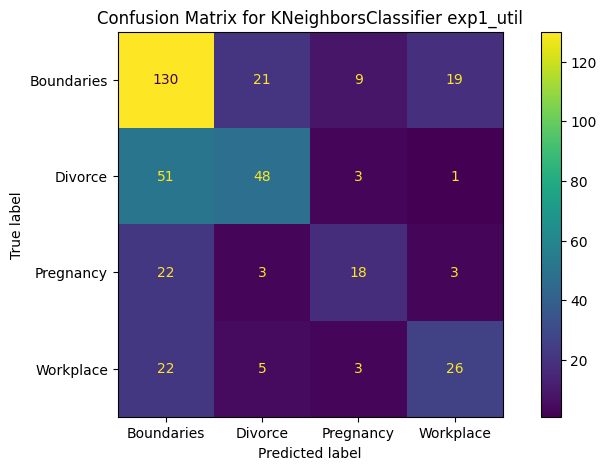

In [ ]:
util_scores = run_with_traditional_clfs(X_scaled, y, UTILITY_TEST_SIZE, "exp1_util")
util_scores

In [ ]:
util_scores.to_csv('results_folder/exp1_utility_results.csv', index=False)

### Privado

100%|██████████| 1279/1279 [00:00<00:00, 8128.30it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

,Model,Acc
0,"KNeighborsClassifier(metric='cosine', n_neighb...",0.655382
1,"SVC(C=0.025, kernel='linear')",0.717882
2,"SVC(C=1, gamma=2)",0.721354
3,DecisionTreeClassifier(max_depth=5),0.644097
4,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.713542
5,"MLPClassifier(alpha=1, max_iter=1000)",0.677083
6,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.721354
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.677083
8,GaussianNB(),0.676215
9,QuadraticDiscriminantAnalysis(),0.724826


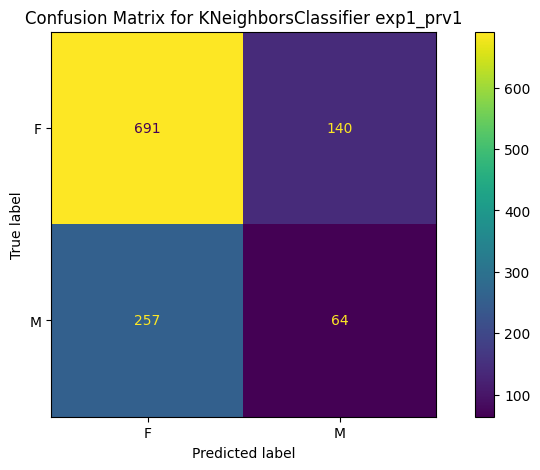

In [ ]:
private_scores = run_with_traditional_clfs(X_scaled, y_privado, ATTACKER_TEST_SIZE, "exp1_prv1")
private_scores

In [ ]:
private_scores.to_csv('results_folder/exp1_private_results.csv', index=False)

### Privado 2

100%|██████████| 1279/1279 [00:00<00:00, 105819.41it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(re

,Model,Acc
0,"KNeighborsClassifier(metric='cosine', n_neighb...",0.895833
1,"SVC(C=0.025, kernel='linear')",0.912326
2,"SVC(C=1, gamma=2)",0.912326
3,DecisionTreeClassifier(max_depth=5),0.863715
4,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.911458
5,"MLPClassifier(alpha=1, max_iter=1000)",0.876736
6,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.912326
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.890625
8,GaussianNB(),0.881076
9,QuadraticDiscriminantAnalysis(),0.912326


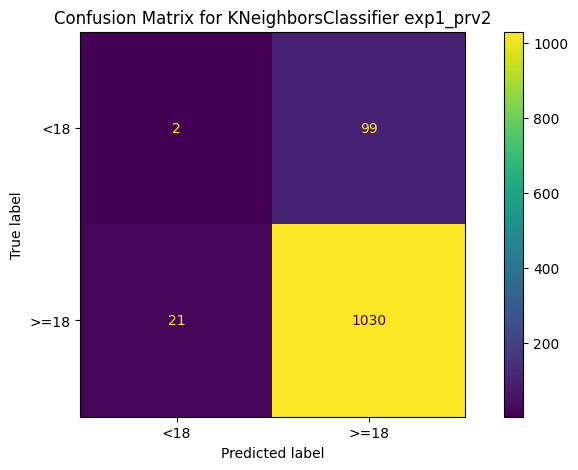

In [ ]:
private_scores = run_with_traditional_clfs(X_scaled, y_privado2, ATTACKER_TEST_SIZE, "exp1_prv2")
private_scores

In [ ]:
private_scores.to_csv('results_folder/exp1_private_2_results.csv', index=False)

# Experimento 2

Remover o atributo privado e tentar o ataque.

[link text](https://)## X anoniizado

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['selftext_anon_preprocess'])

vectorizer.get_feature_names_out()
X_scaled = X
X_scaled.shape

(1279, 9698)

In [ ]:
y

['Divorce',
 'Boundaries',
 'Pregnancy',
 'Divorce',
 'Boundaries',
 'Boundaries',
 'Boundaries',
 'Workplace',
 'Divorce',
 'Boundaries',
 'Pregnancy',
 'Workplace',
 'Boundaries',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Divorce',
 'Divorce',
 'Divorce',
 'Boundaries',
 'Boundaries',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Divorce',
 'Divorce',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Boundaries',
 'Boundaries',
 'Boundaries',
 'Workplace',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Workplace',
 'Divorce',
 'Boundaries',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Boundaries',
 'Divorce',
 'Boundaries',
 'Divorce',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Workplace',
 'Boundaries',
 'Boundaries',
 'Workplace',
 'Workplace',
 'Boundaries',
 'Boundaries',
 'Pregnancy',
 'Boundaries',
 'Divorce',
 'Boundaries',
 'Pregnancy',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Pregnancy',
 'Boundaries',
 'Boundaries',
 'Divorce',
 'Divorce',
 'Divorce',
 'Divorce',
 'Boundaries',
 

###Utilitario

100%|██████████| 1279/1279 [00:00<00:00, 99042.07it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

,Model,Acc
0,"KNeighborsClassifier(metric='cosine', n_neighb...",0.580729
1,"SVC(C=0.025, kernel='linear')",0.575521
2,"SVC(C=1, gamma=2)",0.466146
3,DecisionTreeClassifier(max_depth=5),0.476562
4,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.513021
5,"MLPClassifier(alpha=1, max_iter=1000)",0.601562
6,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.614583
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.432292
8,GaussianNB(),0.533854
9,QuadraticDiscriminantAnalysis(),0.617188


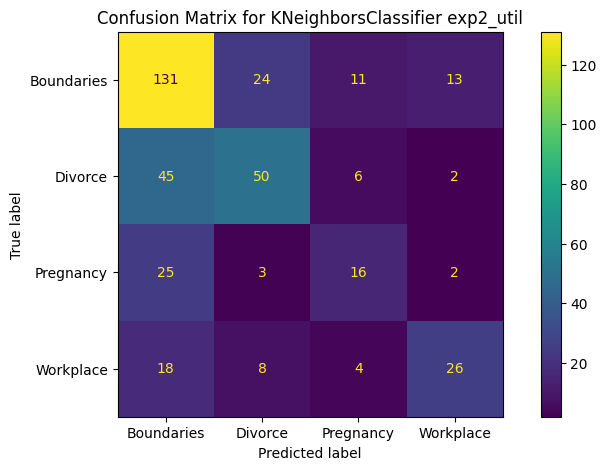

In [ ]:
util_scores = run_with_traditional_clfs(X_scaled, y, UTILITY_TEST_SIZE, "exp2_util")
util_scores

In [ ]:
util_scores.to_csv('results_folder/exp2_utility_results.csv', index=False)

###Privado

100%|██████████| 1279/1279 [00:00<00:00, 57606.15it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

,Model,Acc
0,"KNeighborsClassifier(metric='cosine', n_neighb...",0.657986
1,"SVC(C=0.025, kernel='linear')",0.710069
2,"SVC(C=1, gamma=2)",0.721354
3,DecisionTreeClassifier(max_depth=5),0.606771
4,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.679688
5,"MLPClassifier(alpha=1, max_iter=1000)",0.656250
6,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.637153
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.618924
8,GaussianNB(),0.644965
9,QuadraticDiscriminantAnalysis(),0.719618


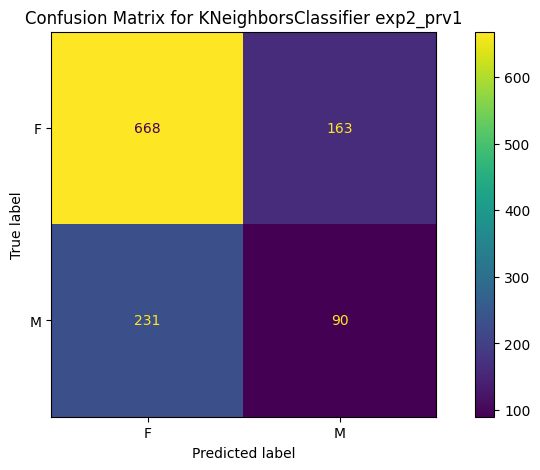

In [ ]:
private_scores = run_with_traditional_clfs(X_scaled, y_privado, ATTACKER_TEST_SIZE, "exp2_prv1")
private_scores

In [ ]:
private_scores.to_csv('results_folder/exp2_private_results.csv', index=False)


###Privado 2

100%|██████████| 1279/1279 [00:00<00:00, 74715.73it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

,Model,Acc
0,"KNeighborsClassifier(metric='cosine', n_neighb...",0.893229
1,"SVC(C=0.025, kernel='linear')",0.912326
2,"SVC(C=1, gamma=2)",0.912326
3,DecisionTreeClassifier(max_depth=5),0.857639
4,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.910590
5,"MLPClassifier(alpha=1, max_iter=1000)",0.863715
6,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.912326
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.868924
8,GaussianNB(),0.873264
9,QuadraticDiscriminantAnalysis(),0.912326


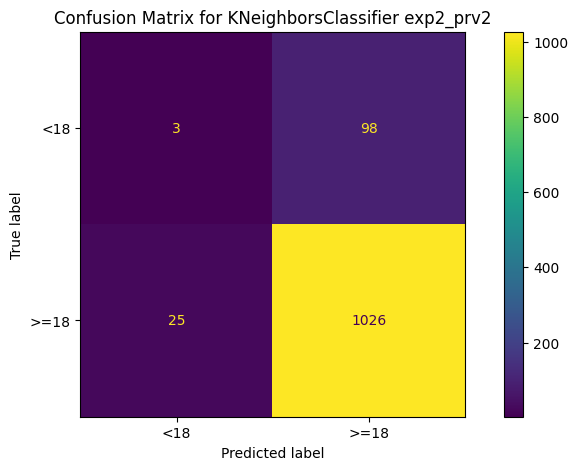

In [ ]:
private_scores = run_with_traditional_clfs(X_scaled, y_privado2, ATTACKER_TEST_SIZE, "exp2_prv2")
private_scores

In [ ]:
private_scores.to_csv('results_folder/exp2_private_2_results.csv', index=False)

#Experimento 3

In [ ]:
X = vectorizer.fit_transform(df['selftext_preprocess'])
A = create_knn_graph_matrix(X, 3)
X_graph = run_deepwalk(A)

100%|██████████| 1279/1279 [00:00<00:00, 79638.29it/s]


In [ ]:
X_graph.shape

(1279, 32)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_nn = np.array(y).reshape(-1, 1)
enc.fit(y_nn)
public_labels = enc.transform(y_nn).toarray()
public_labels

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_nn_p = np.array(y_privado_combined).reshape(-1, 1)
enc.fit(y_nn_p)
private_labels = enc.transform(y_nn_p).toarray()
private_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
public_labels.shape[1]

4

In [ ]:
private_labels.shape[1]

4

In [ ]:
!pip install scikit-network

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy, KLDivergence, CosineSimilarity
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# # Carregando o dataset Iris
# iris = load_iris()
# X_base = iris.data
# y = iris.target

# # gerando um grafo # este é o grafo que a gente disponibiliza publicamente e gostaria que não houvesse ataque
# from sklearn.neighbors import kneighbors_graph
# A = kneighbors_graph(X_base, 2, mode='connectivity', include_self=True)
# G = nx.Graph(A.toarray())

# embeddings do grafo
# dw = DeepWalk(10, 128, 10, 30)
# walks = dw.get_walks(G)
# emb = dw.compute_embeddings(walks)

# X = []
# for i in range(0,len(emb)):
#   X.append(emb[i])
# X = np.array(X)

# # Criação dos rótulos públicos e privados
# public_labels = []
# for label in y:
#   if label==1: public_labels.append([0,1])
#   if label==2: public_labels.append([1,0])
#   if label==0: public_labels.append([-1,-1]) # o label privado recebe -1 na parte public
# public_labels = np.array(public_labels)

# private_labels = []
# for label in y:
#   if label==0: private_labels.append([1,1]) # label privado
#   if label==1: private_labels.append([-1,-1]) # label public recebe -1 na parte private
#   if label==2: private_labels.append([-1,-1])

# private_labels = np.array(private_labels)

# Divisão dos Dados em Treino e Validação

ENCODER_DEFAULT_TEST_SIZE = 0.3

# Definindo a Arquitetura
def build_privacy_preserving_autoencoder(input_dim, encoding_dim, public_label_dim, private_label_dim):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    # encoded = Dense(input_dim*4, activation='linear')(input_layer)
    # encoded = Dense(input_dim*2, activation='relu')(encoded)
    encoded = Dense(input_dim, activation='linear')(input_layer)
    encoded = Dense(encoding_dim, activation='relu')(encoded)

    # Decoder
    decoded = Dense(input_dim, activation='linear')(encoded)

    # Public Label Predictor
    public_pred = Dense(public_label_dim, activation='softmax')(encoded)

    # Private Label Predictor
    private_pred = Dense(private_label_dim, activation='softmax')(encoded)

    # Models
    autoencoder = Model(inputs=input_layer, outputs=decoded, name='Autoencoder')
    public_model = Model(inputs=input_layer, outputs=public_pred, name='PublicPredictor')
    private_model = Model(inputs=input_layer, outputs=private_pred, name='PrivatePredictor')
    encoder_model = Model(inputs=input_layer, outputs=encoded, name='Encoder')

    return autoencoder, public_model, private_model, encoder_model

# Função de Perda Personalizada com Pesos
def custom_loss(autoencoder, public_model, private_model, X, public_labels, private_labels, beta, gamma):

    #mse = 1/(MeanSquaredError()(X,autoencoder(X))+1)

    # Previsão de Rótulos Públicos
    mask_public = []
    for l in public_labels:
      if l[0]!=-1: # entao eh public label
        mask_public.append(1)
      else: mask_public.append(0)
    mask_public = np.array(mask_public)
    public_loss = CategoricalCrossentropy()(public_labels[mask_public.astype(bool)], public_model(X)[mask_public.astype(bool)]) #precisamos minimizar


    mask_private = []
    for l in private_labels:
      if l[0]!=-1: # entao eh private label
        mask_private.append(1)
      else: mask_private.append(0)
    mask_private = np.array(mask_private)
    private_loss = -CategoricalCrossentropy()(private_labels[mask_private.astype(bool)], private_model(X)[mask_private.astype(bool)])

    return 0, beta * public_loss , gamma * private_loss

def run_privacy_preserving_autoencoder(X, test_size, beta, gamma, encoding_dim):
    X_train, X_val, public_labels_train, public_labels_val, private_labels_train, private_labels_val = train_test_split(
        X, public_labels, private_labels, test_size=test_size, random_state=RANDOM_STATE)

    # Parâmetros da Rede
    input_dim = X.shape[1]
    encoding_dim = encoding_dim
    public_label_dim = public_labels.shape[1]
    private_label_dim = private_labels.shape[1]

    # Pesos das Perdas
    # beta = 1.0   # Peso para a perda de previsão pública
    # gamma = 1.0  # Peso para a perda de previsão privada (invertida)

    # Construção da Rede
    autoencoder, public_model, private_model, encoder_model = build_privacy_preserving_autoencoder(input_dim, encoding_dim, public_label_dim, private_label_dim)

    # Compilação dos Modelos
    optimizer = Adamax()

    # Treinamento da Rede
    epochs = 15
    batch_size = 8

    for epoch in range(epochs):
        # Treinamento
        train_autoencoder_loss, train_public_loss, train_private_loss = 0, 0, 0
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i + batch_size]
            public_labels_batch = public_labels_train[i:i + batch_size]
            private_labels_batch = private_labels_train[i:i + batch_size]

            with tf.GradientTape() as tape:
                autoencoder_loss, public_loss, private_loss = custom_loss(autoencoder, public_model, private_model, X_batch, public_labels_batch, private_labels_batch,beta, gamma)
                loss_value = autoencoder_loss + public_loss + private_loss

            grads = tape.gradient(loss_value, public_model.trainable_weights + private_model.trainable_weights)
            #print(grads)
            optimizer.apply_gradients(zip(grads,public_model.trainable_weights + private_model.trainable_weights))

            #train_autoencoder_loss += autoencoder_loss.numpy()
            train_public_loss += public_loss.numpy()
            train_private_loss += private_loss.numpy()

        # Validação
        val_public_loss, val_private_loss = 0, 0
        for i in range(0, len(X_val), batch_size):
            X_batch = X_val[i:i + batch_size]
            public_labels_batch = public_labels_val[i:i + batch_size]
            private_labels_batch = private_labels_val[i:i + batch_size]

            autoencoder_loss, public_loss, private_loss = custom_loss( autoencoder, public_model, private_model,
                                                                        X_batch, public_labels_batch, private_labels_batch,
                                                                        beta, gamma)

            val_public_loss += public_loss.numpy()
            val_private_loss += private_loss.numpy()

        # Impressão das Perdas
        train_public_loss /= len(X_train) // batch_size
        train_private_loss /= len(X_train) // batch_size

        val_public_loss /= len(X_val) // batch_size
        val_private_loss /= len(X_val) // batch_size

        print(f"Epoch {epoch}:")
        print(f"  Training   -> Public Loss: {train_public_loss:.4f}, Private Loss: {train_private_loss:.4f}")
        print(f"  Validation -> Public Loss: {val_public_loss:.4f}, Private Loss: {val_private_loss:.4f}")

    print("Treinamento concluído!")
    return autoencoder, public_model, private_model, encoder_model

# Função para gerar a representação final dos dados usando o autoencoder aprendido
def generate_representation(encoder_model, X):
    return encoder_model.predict(X)

def change_params_and_run_classification(X, y, clf_test_size, encoding_dims, beta_gamma, fig_label_exp):
    all_results = pd.DataFrame()
    for enc_dim in encoding_dims:
        for params in beta_gamma:
            beta = params[0]
            gamma = params[1]

            # Treinamento do autoencoder
            autoencoder, public_model, private_model, encoder_model = run_privacy_preserving_autoencoder(X, ENCODER_DEFAULT_TEST_SIZE, beta, gamma, enc_dim)

            # Gera representação final para os dados de validação
            X_preserving = generate_representation(encoder_model, X)

            # Classificação utilizando representação final
            result = run_with_traditional_clfs(X_preserving, y, clf_test_size, f"{fig_label_exp}_b{beta}_g{gamma}")
            result['beta_gama'] = str(beta)+'-'+str(gamma)
            result['encoding_dim'] = enc_dim
            all_results = pd.concat([all_results, result], axis=0, ignore_index=True)

    #Organiza resultados por modelo
    all_results['Model'] = all_results['Model'].astype(str)
    all_results = all_results.sort_values(by='Model')
    return all_results

In [ ]:
#Reutiliza dados do experimento anterior
X = X_graph

In [ ]:
# import numpy as np
# from sklearn.manifold import TSNE
# from matplotlib import pyplot as plt
# import seaborn as sns
# from sknetwork.gnn.gnn_classifier import GNNClassifier
# from sklearn.neighbors import kneighbors_graph
# import networkx as nx
# from sklearn.metrics import classification_report

# def plot_encoded_representations(X_preserving, y_true):

#     X_encoded = TSNE(n_components=2, learning_rate='auto',
#                       init='pca', perplexity=15).fit_transform(X_preserving)


#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=X_encoded[:, 0], y=X_encoded[:, 1], hue=y_true, palette="Set1", s=100, legend='full')
#     plt.title('Representações Codificadas das Classes')
#     plt.xlabel('Feature 1 Codificada')
#     plt.ylabel('Feature 2 Codificada')
#     plt.legend(title='Classe', loc='best')
#     plt.show()

# # Plot do scatter plot das representações codificadas
# plot_encoded_representations(X_preserving, y)

##Utilitario

Parameters

In [ ]:
# DEFAULT_BETA_GAMMA = [[0.0,1.0],[1.0,0.0],[1.0,1.0],[0.5,1.0],[1.0,0.5]]
BETA_GAMMA = [[1.0,1.0]]
ENCODING_DIMS = [2]

In [ ]:
X

array([[-0.7475837 , -0.9378986 ,  0.7835881 , ..., -1.1734518 ,
         0.11742803,  0.5958754 ],
       [-0.55994934,  0.23715435,  0.5190348 , ...,  1.9040434 ,
         0.87155926,  3.3371613 ],
       [-1.1855438 , -1.536638  , -1.0331275 , ..., -1.1438972 ,
        -1.5875891 , -1.506465  ],
       ...,
       [-0.4312502 , -0.73125654,  0.2177718 , ..., -0.10538188,
         2.615292  ,  1.2669508 ],
       [-0.42260507, -1.499689  , -0.518904  , ..., -0.7525486 ,
        -2.6792884 ,  0.8818751 ],
       [ 2.1293077 ,  0.772677  ,  0.00763527, ..., -0.7055806 ,
         1.3867295 ,  1.1392208 ]], dtype=float32)

In [ ]:
X.shape

(1279, 32)

In [ ]:
X_graph.shape

(1279, 32)

In [ ]:
len(y)

1279

Epoch 0:
  Training   -> Public Loss: 1.6847, Private Loss: -2.1772
  Validation -> Public Loss: 1.8562, Private Loss: -3.0071
Epoch 1:
  Training   -> Public Loss: 2.1722, Private Loss: -5.0652
  Validation -> Public Loss: 2.8152, Private Loss: -7.6220
Epoch 2:
  Training   -> Public Loss: 2.9388, Private Loss: -9.7052
  Validation -> Public Loss: 2.9903, Private Loss: -10.9036
Epoch 3:
  Training   -> Public Loss: 2.5940, Private Loss: -11.4858
  Validation -> Public Loss: 2.3656, Private Loss: -11.6577
Epoch 4:
  Training   -> Public Loss: 1.9687, Private Loss: -11.8399
  Validation -> Public Loss: 1.7578, Private Loss: -11.7691
Epoch 5:
  Training   -> Public Loss: 1.5069, Private Loss: -11.9068
  Validation -> Public Loss: 1.3841, Private Loss: -11.8218
Epoch 6:
  Training   -> Public Loss: 1.2835, Private Loss: -11.9549
  Validation -> Public Loss: 1.2441, Private Loss: -11.8540
Epoch 7:
  Training   -> Public Loss: 1.2205, Private Loss: -11.9944
  Validation -> Public Loss: 1.22

100%|██████████| 1279/1279 [00:00<00:00, 66121.64it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

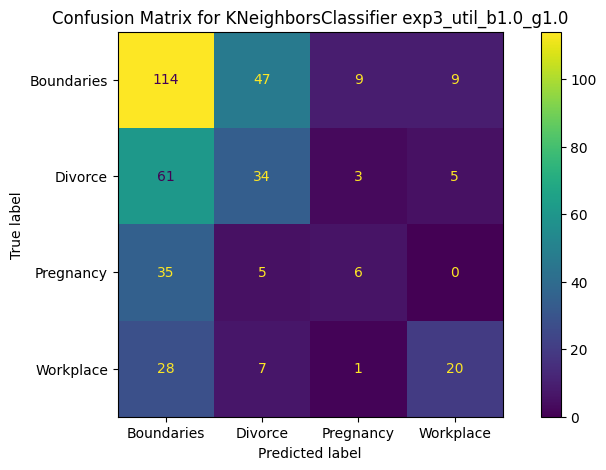

In [ ]:
exp3_utility_results = change_params_and_run_classification(X, y, UTILITY_TEST_SIZE, ENCODING_DIMS, BETA_GAMMA, "exp3_util")

In [ ]:
#Resultados Utilitário
exp3_utility_results.to_csv('results_folder/exp3_utility_results.csv', index=False)
exp3_utility_results

,Model,Acc,beta_gama,encoding_dim
7,"AdaBoostClassifier(algorithm='SAMME', random_s...",0.458333,1.0-1.0,2
3,DecisionTreeClassifier(max_depth=5),0.434896,1.0-1.0,2
12,DummyClassifier(strategy='stratified'),0.338542,1.0-1.0,2
8,GaussianNB(),0.479167,1.0-1.0,2
6,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.497396,1.0-1.0,2
11,GradientBoostingClassifier(),0.460938,1.0-1.0,2
0,"KNeighborsClassifier(metric='cosine', n_neighb...",0.453125,1.0-1.0,2
10,LogisticRegression(),0.453125,1.0-1.0,2
5,"MLPClassifier(alpha=1, max_iter=1000)",0.414062,1.0-1.0,2
9,QuadraticDiscriminantAnalysis(),0.356771,1.0-1.0,2


In [ ]:
#Melhor resultado utilitário
max_acc = exp3_utility_results['Acc'].max()
exp3_utility_results[exp3_utility_results['Acc']==max_acc]

,Model,Acc,beta_gama,encoding_dim
6,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.497396,1.0-1.0,2


##Privado

Epoch 0:
  Training   -> Public Loss: 2.3207, Private Loss: -2.6037
  Validation -> Public Loss: 2.4893, Private Loss: -3.1263
Epoch 1:
  Training   -> Public Loss: 2.8182, Private Loss: -4.4036
  Validation -> Public Loss: 3.5244, Private Loss: -6.2698
Epoch 2:
  Training   -> Public Loss: 3.8968, Private Loss: -8.2134
  Validation -> Public Loss: 4.6690, Private Loss: -10.4378
Epoch 3:
  Training   -> Public Loss: 4.6423, Private Loss: -11.4696
  Validation -> Public Loss: 4.8270, Private Loss: -12.4735
Epoch 4:
  Training   -> Public Loss: 4.4309, Private Loss: -12.8085
  Validation -> Public Loss: 4.2906, Private Loss: -13.2805
Epoch 5:
  Training   -> Public Loss: 3.8801, Private Loss: -13.4953
  Validation -> Public Loss: 3.7745, Private Loss: -13.9588
Epoch 6:
  Training   -> Public Loss: 3.3597, Private Loss: -14.1891
  Validation -> Public Loss: 3.2068, Private Loss: -14.5549
Epoch 7:
  Training   -> Public Loss: 2.7573, Private Loss: -14.6988
  Validation -> Public Loss: 2.50

100%|██████████| 1279/1279 [00:00<00:00, 51111.06it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

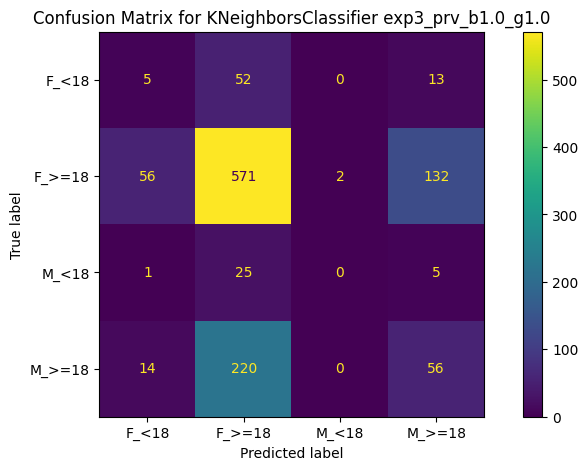

In [ ]:
exp3_private_results = change_params_and_run_classification(X, y_privado_combined, ATTACKER_TEST_SIZE, ENCODING_DIMS, BETA_GAMMA, "exp3_prv")

In [ ]:
exp3_private_results.to_csv('results_folder/exp3_private_results.csv', index=False)
exp3_private_results

,Model,Acc,beta_gama,encoding_dim
7,"AdaBoostClassifier(algorithm='SAMME', random_s...",0.580729,1.0-1.0,2
3,DecisionTreeClassifier(max_depth=5),0.555556,1.0-1.0,2
12,DummyClassifier(strategy='stratified'),0.506944,1.0-1.0,2
8,GaussianNB(),0.559028,1.0-1.0,2
6,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.656250,1.0-1.0,2
11,GradientBoostingClassifier(),0.558160,1.0-1.0,2
0,"KNeighborsClassifier(metric='cosine', n_neighb...",0.548611,1.0-1.0,2
10,LogisticRegression(),0.549479,1.0-1.0,2
5,"MLPClassifier(alpha=1, max_iter=1000)",0.531250,1.0-1.0,2
9,QuadraticDiscriminantAnalysis(),0.660590,1.0-1.0,2


In [ ]:
max_acc = exp3_private_results['Acc'].max()
exp3_private_results[exp3_private_results['Acc']==max_acc]

,Model,Acc,beta_gama,encoding_dim
9,QuadraticDiscriminantAnalysis(),0.66059,1.0-1.0,2


#Experimento 4

In [ ]:
X = vectorizer.fit_transform(df['selftext_anon_preprocess'])
A = create_knn_graph_matrix(X, 3)
X_graph = run_deepwalk(A)

100%|██████████| 1279/1279 [00:00<00:00, 50615.79it/s]


In [ ]:
X_graph.shape

(1279, 32)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_nn = np.array(y).reshape(-1, 1)
enc.fit(y_nn)
public_labels = enc.transform(y_nn).toarray()
public_labels

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_nn_p = np.array(y_privado_combined).reshape(-1, 1)
enc.fit(y_nn_p)
private_labels = enc.transform(y_nn_p).toarray()
private_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
public_labels.shape[1]

4

In [ ]:
private_labels.shape[1]

4

In [ ]:
# !pip install scikit-network

# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy, KLDivergence, CosineSimilarity
# from tensorflow.keras.optimizers import Adamax
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_iris
# from sklearn.neighbors import NearestNeighbors
# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier

# # # Carregando o dataset Iris
# # iris = load_iris()
# # X_base = iris.data
# # y = iris.target

# # # gerando um grafo # este é o grafo que a gente disponibiliza publicamente e gostaria que não houvesse ataque
# # from sklearn.neighbors import kneighbors_graph
# # A = kneighbors_graph(X_base, 2, mode='connectivity', include_self=True)
# # G = nx.Graph(A.toarray())

# # embeddings do grafo
# # dw = DeepWalk(10, 128, 10, 30)
# # walks = dw.get_walks(G)
# # emb = dw.compute_embeddings(walks)

# # X = []
# # for i in range(0,len(emb)):
# #   X.append(emb[i])
# # X = np.array(X)

# # # Criação dos rótulos públicos e privados
# # public_labels = []
# # for label in y:
# #   if label==1: public_labels.append([0,1])
# #   if label==2: public_labels.append([1,0])
# #   if label==0: public_labels.append([-1,-1]) # o label privado recebe -1 na parte public
# # public_labels = np.array(public_labels)

# # private_labels = []
# # for label in y:
# #   if label==0: private_labels.append([1,1]) # label privado
# #   if label==1: private_labels.append([-1,-1]) # label public recebe -1 na parte private
# #   if label==2: private_labels.append([-1,-1])

# # private_labels = np.array(private_labels)

# # Divisão dos Dados em Treino e Validação

# ENCODER_DEFAULT_TEST_SIZE = 0.3

# # Definindo a Arquitetura
# def build_privacy_preserving_autoencoder(input_dim, encoding_dim, public_label_dim, private_label_dim):
#     # Encoder
#     input_layer = Input(shape=(input_dim,))
#     # encoded = Dense(input_dim*4, activation='linear')(input_layer)
#     # encoded = Dense(input_dim*2, activation='relu')(encoded)
#     encoded = Dense(input_dim, activation='linear')(input_layer)
#     encoded = Dense(encoding_dim, activation='relu')(encoded)

#     # Decoder
#     decoded = Dense(input_dim, activation='linear')(encoded)

#     # Public Label Predictor
#     public_pred = Dense(public_label_dim, activation='softmax')(encoded)

#     # Private Label Predictor
#     private_pred = Dense(private_label_dim, activation='softmax')(encoded)

#     # Models
#     autoencoder = Model(inputs=input_layer, outputs=decoded, name='Autoencoder')
#     public_model = Model(inputs=input_layer, outputs=public_pred, name='PublicPredictor')
#     private_model = Model(inputs=input_layer, outputs=private_pred, name='PrivatePredictor')
#     encoder_model = Model(inputs=input_layer, outputs=encoded, name='Encoder')

#     return autoencoder, public_model, private_model, encoder_model

# # Função de Perda Personalizada com Pesos
# def custom_loss(autoencoder, public_model, private_model, X, public_labels, private_labels, beta, gamma):

#     #mse = 1/(MeanSquaredError()(X,autoencoder(X))+1)

#     # Previsão de Rótulos Públicos
#     mask_public = []
#     for l in public_labels:
#       if l[0]!=-1: # entao eh public label
#         mask_public.append(1)
#       else: mask_public.append(0)
#     mask_public = np.array(mask_public)
#     public_loss = CategoricalCrossentropy()(public_labels[mask_public.astype(bool)], public_model(X)[mask_public.astype(bool)]) #precisamos minimizar


#     mask_private = []
#     for l in private_labels:
#       if l[0]!=-1: # entao eh private label
#         mask_private.append(1)
#       else: mask_private.append(0)
#     mask_private = np.array(mask_private)
#     private_loss = -CategoricalCrossentropy()(private_labels[mask_private.astype(bool)], private_model(X)[mask_private.astype(bool)])

#     return 0, beta * public_loss , gamma * private_loss

# def run_privacy_preserving_autoencoder(X, test_size, beta, gamma, encoding_dim):
#     X_train, X_val, public_labels_train, public_labels_val, private_labels_train, private_labels_val = train_test_split(
#         X, public_labels, private_labels, test_size=test_size, random_state=RANDOM_STATE)

#     # Parâmetros da Rede
#     input_dim = X.shape[1]
#     encoding_dim = encoding_dim
#     public_label_dim = public_labels.shape[1]
#     private_label_dim = private_labels.shape[1]

#     # Pesos das Perdas
#     # beta = 1.0   # Peso para a perda de previsão pública
#     # gamma = 1.0  # Peso para a perda de previsão privada (invertida)

#     # Construção da Rede
#     autoencoder, public_model, private_model, encoder_model = build_privacy_preserving_autoencoder(input_dim, encoding_dim, public_label_dim, private_label_dim)

#     # Compilação dos Modelos
#     optimizer = Adamax()

#     # Treinamento da Rede
#     epochs = 15
#     batch_size = 8

#     for epoch in range(epochs):
#         # Treinamento
#         train_autoencoder_loss, train_public_loss, train_private_loss = 0, 0, 0
#         for i in range(0, len(X_train), batch_size):
#             X_batch = X_train[i:i + batch_size]
#             public_labels_batch = public_labels_train[i:i + batch_size]
#             private_labels_batch = private_labels_train[i:i + batch_size]

#             with tf.GradientTape() as tape:
#                 autoencoder_loss, public_loss, private_loss = custom_loss(autoencoder, public_model, private_model, X_batch, public_labels_batch, private_labels_batch,beta, gamma)
#                 loss_value = autoencoder_loss + public_loss + private_loss

#             grads = tape.gradient(loss_value, public_model.trainable_weights + private_model.trainable_weights)
#             #print(grads)
#             optimizer.apply_gradients(zip(grads,public_model.trainable_weights + private_model.trainable_weights))

#             #train_autoencoder_loss += autoencoder_loss.numpy()
#             train_public_loss += public_loss.numpy()
#             train_private_loss += private_loss.numpy()

#         # Validação
#         val_public_loss, val_private_loss = 0, 0
#         for i in range(0, len(X_val), batch_size):
#             X_batch = X_val[i:i + batch_size]
#             public_labels_batch = public_labels_val[i:i + batch_size]
#             private_labels_batch = private_labels_val[i:i + batch_size]

#             autoencoder_loss, public_loss, private_loss = custom_loss( autoencoder, public_model, private_model,
#                                                                         X_batch, public_labels_batch, private_labels_batch,
#                                                                         beta, gamma)

#             val_public_loss += public_loss.numpy()
#             val_private_loss += private_loss.numpy()

#         # Impressão das Perdas
#         train_public_loss /= len(X_train) // batch_size
#         train_private_loss /= len(X_train) // batch_size

#         val_public_loss /= len(X_val) // batch_size
#         val_private_loss /= len(X_val) // batch_size

#         print(f"Epoch {epoch}:")
#         print(f"  Training   -> Public Loss: {train_public_loss:.4f}, Private Loss: {train_private_loss:.4f}")
#         print(f"  Validation -> Public Loss: {val_public_loss:.4f}, Private Loss: {val_private_loss:.4f}")

#     print("Treinamento concluído!")
#     return autoencoder, public_model, private_model, encoder_model

# # Função para gerar a representação final dos dados usando o autoencoder aprendido
# def generate_representation(encoder_model, X):
#     return encoder_model.predict(X)

# def change_params_and_run_classification(X, y, clf_test_size, encoding_dims, beta_gamma):
#     all_results = pd.DataFrame()
#     for enc_dim in encoding_dims:
#         for params in beta_gamma:
#             beta = params[0]
#             gamma = params[1]

#             # Treinamento do autoencoder
#             autoencoder, public_model, private_model, encoder_model = run_privacy_preserving_autoencoder(X, ENCODER_DEFAULT_TEST_SIZE, beta, gamma, enc_dim)

#             # Gera representação final para os dados de validação
#             X_preserving = generate_representation(encoder_model, X)

#             # Classificação utilizando representação final
#             result = run_with_traditional_clfs(X_preserving, y, clf_test_size)
#             result['beta_gama'] = str(beta)+'-'+str(gamma)
#             result['encoding_dim'] = enc_dim
#             all_results = pd.concat([all_results, result], axis=0, ignore_index=True)

#     #Organiza resultados por modelo
#     all_results['Model'] = all_results['Model'].astype(str)
#     all_results = all_results.sort_values(by='Model')
#     return all_results

In [ ]:
#Reutiliza dados do experimento anterior
X = X_graph

In [ ]:
# import numpy as np
# from sklearn.manifold import TSNE
# from matplotlib import pyplot as plt
# import seaborn as sns
# from sknetwork.gnn.gnn_classifier import GNNClassifier
# from sklearn.neighbors import kneighbors_graph
# import networkx as nx
# from sklearn.metrics import classification_report

# def plot_encoded_representations(X_preserving, y_true):

#     X_encoded = TSNE(n_components=2, learning_rate='auto',
#                       init='pca', perplexity=15).fit_transform(X_preserving)


#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=X_encoded[:, 0], y=X_encoded[:, 1], hue=y_true, palette="Set1", s=100, legend='full')
#     plt.title('Representações Codificadas das Classes')
#     plt.xlabel('Feature 1 Codificada')
#     plt.ylabel('Feature 2 Codificada')
#     plt.legend(title='Classe', loc='best')
#     plt.show()

# # Plot do scatter plot das representações codificadas
# plot_encoded_representations(X_preserving, y)

##Utilitario

Parameters

In [ ]:
DEFAULT_BETA_GAMMA = [[0.0,1.0],[1.0,0.0],[1.0,1.0],[0.5,1.0],[1.0,0.5]]
ENCODING_DIMS = [2,16]

Epoch 0:
  Training   -> Public Loss: 2.2315, Private Loss: -6.2863
  Validation -> Public Loss: 2.6506, Private Loss: -10.0362
Epoch 1:
  Training   -> Public Loss: 2.9808, Private Loss: -12.5832
  Validation -> Public Loss: 3.0507, Private Loss: -14.1227
Epoch 2:
  Training   -> Public Loss: 2.8875, Private Loss: -14.5851
  Validation -> Public Loss: 2.6556, Private Loss: -14.8481
Epoch 3:
  Training   -> Public Loss: 2.3727, Private Loss: -14.9383
  Validation -> Public Loss: 2.1234, Private Loss: -15.0207
Epoch 4:
  Training   -> Public Loss: 1.8824, Private Loss: -15.0665
  Validation -> Public Loss: 1.6659, Private Loss: -15.0926
Epoch 5:
  Training   -> Public Loss: 1.5121, Private Loss: -15.1336
  Validation -> Public Loss: 1.3518, Private Loss: -15.1363
Epoch 6:
  Training   -> Public Loss: 1.3125, Private Loss: -15.1889
  Validation -> Public Loss: 1.2283, Private Loss: -15.1748
Epoch 7:
  Training   -> Public Loss: 1.2611, Private Loss: -15.2212
  Validation -> Public Loss: 

100%|██████████| 1279/1279 [00:00<00:00, 108729.88it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(re

Epoch 0:
  Training   -> Public Loss: 1.4538, Private Loss: -2.6164
  Validation -> Public Loss: 1.4215, Private Loss: -5.0940
Epoch 1:
  Training   -> Public Loss: 1.8981, Private Loss: -9.3838
  Validation -> Public Loss: 1.9198, Private Loss: -13.8507
Epoch 2:
  Training   -> Public Loss: 2.1261, Private Loss: -14.7320
  Validation -> Public Loss: 1.7415, Private Loss: -15.0679
Epoch 3:
  Training   -> Public Loss: 1.7239, Private Loss: -15.1471
  Validation -> Public Loss: 1.4125, Private Loss: -15.1650
Epoch 4:
  Training   -> Public Loss: 1.3641, Private Loss: -15.1975
  Validation -> Public Loss: 1.2296, Private Loss: -15.2076
Epoch 5:
  Training   -> Public Loss: 1.1818, Private Loss: -15.2307
  Validation -> Public Loss: 1.1446, Private Loss: -15.2231
Epoch 6:
  Training   -> Public Loss: 1.0920, Private Loss: -15.2488
  Validation -> Public Loss: 1.0989, Private Loss: -15.2321
Epoch 7:
  Training   -> Public Loss: 1.0383, Private Loss: -15.2587
  Validation -> Public Loss: 1.

100%|██████████| 1279/1279 [00:00<00:00, 111032.08it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(re

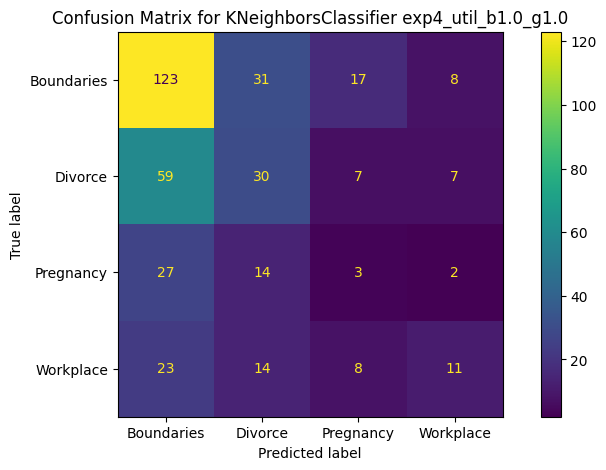

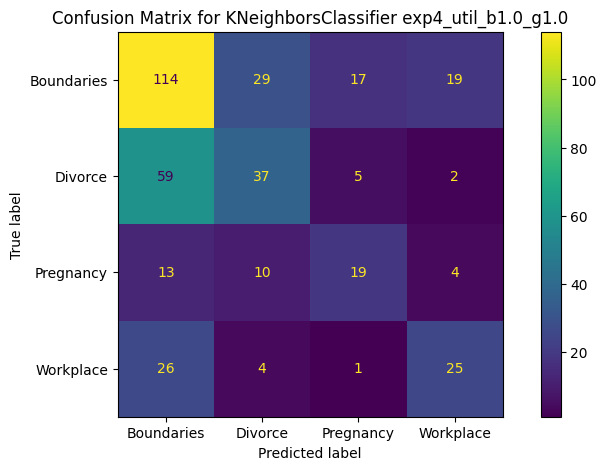

In [ ]:
exp3_utility_results = change_params_and_run_classification(X, y, UTILITY_TEST_SIZE, ENCODING_DIMS, BETA_GAMMA, "exp4_util")

In [ ]:
#Resultados Utilitário
exp3_utility_results.to_csv('results_folder/exp4_utility_results.csv', index=False)
exp3_utility_results

,Model,Acc,beta_gama,encoding_dim
20,"AdaBoostClassifier(algorithm='SAMME', random_s...",0.494792,1.0-1.0,16
7,"AdaBoostClassifier(algorithm='SAMME', random_s...",0.440104,1.0-1.0,2
16,DecisionTreeClassifier(max_depth=5),0.450521,1.0-1.0,16
3,DecisionTreeClassifier(max_depth=5),0.406250,1.0-1.0,2
12,DummyClassifier(strategy='stratified'),0.330729,1.0-1.0,2
25,DummyClassifier(strategy='stratified'),0.268229,1.0-1.0,16
21,GaussianNB(),0.494792,1.0-1.0,16
8,GaussianNB(),0.437500,1.0-1.0,2
6,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.466146,1.0-1.0,2
19,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.510417,1.0-1.0,16


In [ ]:
#Melhor resultado utilitário
max_acc = exp3_utility_results['Acc'].max()
exp3_utility_results[exp3_utility_results['Acc']==max_acc]

,Model,Acc,beta_gama,encoding_dim
24,GradientBoostingClassifier(),0.526042,1.0-1.0,16


##Privado

Epoch 0:
  Training   -> Public Loss: 1.4025, Private Loss: -1.3597
  Validation -> Public Loss: 1.3362, Private Loss: -1.4265
Epoch 1:
  Training   -> Public Loss: 1.3343, Private Loss: -1.4800
  Validation -> Public Loss: 1.2909, Private Loss: -1.5309
Epoch 2:
  Training   -> Public Loss: 1.3074, Private Loss: -1.5860
  Validation -> Public Loss: 1.2508, Private Loss: -1.6640
Epoch 3:
  Training   -> Public Loss: 1.2990, Private Loss: -1.7553
  Validation -> Public Loss: 1.2395, Private Loss: -1.8969
Epoch 4:
  Training   -> Public Loss: 1.3563, Private Loss: -2.1119
  Validation -> Public Loss: 1.3385, Private Loss: -2.4708
Epoch 5:
  Training   -> Public Loss: 1.6450, Private Loss: -3.1501
  Validation -> Public Loss: 1.8075, Private Loss: -4.2994
Epoch 6:
  Training   -> Public Loss: 2.5385, Private Loss: -6.3538
  Validation -> Public Loss: 2.9903, Private Loss: -9.3558
Epoch 7:
  Training   -> Public Loss: 3.8283, Private Loss: -11.8584
  Validation -> Public Loss: 3.7162, Priva

100%|██████████| 1279/1279 [00:00<00:00, 67998.21it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

Epoch 0:
  Training   -> Public Loss: 1.7452, Private Loss: -7.8809
  Validation -> Public Loss: 1.5101, Private Loss: -13.0910
Epoch 1:
  Training   -> Public Loss: 1.4616, Private Loss: -14.8748
  Validation -> Public Loss: 1.1550, Private Loss: -15.4692
Epoch 2:
  Training   -> Public Loss: 1.2004, Private Loss: -15.5974
  Validation -> Public Loss: 1.0834, Private Loss: -15.6767
Epoch 3:
  Training   -> Public Loss: 1.1036, Private Loss: -15.7126
  Validation -> Public Loss: 1.0527, Private Loss: -15.7370
Epoch 4:
  Training   -> Public Loss: 1.0480, Private Loss: -15.7471
  Validation -> Public Loss: 1.0372, Private Loss: -15.7569
Epoch 5:
  Training   -> Public Loss: 1.0117, Private Loss: -15.7628
  Validation -> Public Loss: 1.0291, Private Loss: -15.7652
Epoch 6:
  Training   -> Public Loss: 0.9852, Private Loss: -15.7683
  Validation -> Public Loss: 1.0257, Private Loss: -15.7682
Epoch 7:
  Training   -> Public Loss: 0.9646, Private Loss: -15.7704
  Validation -> Public Loss: 

100%|██████████| 1279/1279 [00:00<00:00, 133942.09it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(re

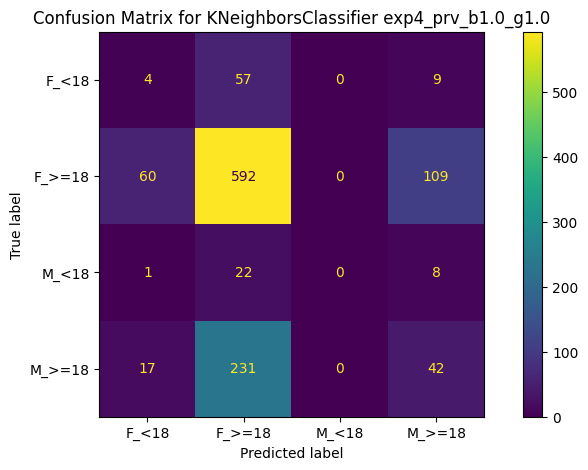

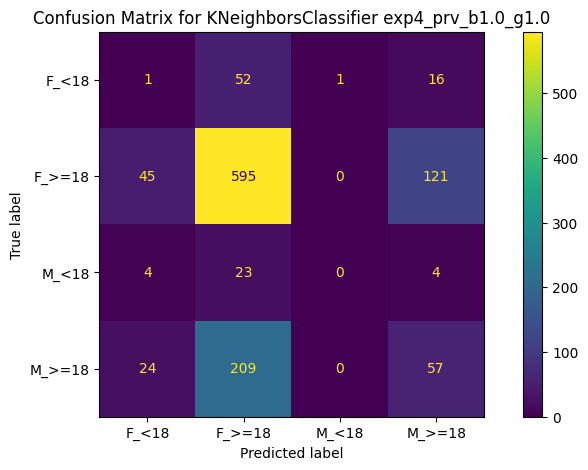

In [ ]:
exp3_private_results = change_params_and_run_classification(X, y_privado_combined, ATTACKER_TEST_SIZE, ENCODING_DIMS, BETA_GAMMA, "exp4_prv")

In [ ]:
exp3_private_results.to_csv('results_folder/exp4_private_results.csv', index=False)
exp3_private_results

,Model,Acc,beta_gama,encoding_dim
20,"AdaBoostClassifier(algorithm='SAMME', random_s...",0.592014,1.0-1.0,16
7,"AdaBoostClassifier(algorithm='SAMME', random_s...",0.552083,1.0-1.0,2
16,DecisionTreeClassifier(max_depth=5),0.565104,1.0-1.0,16
3,DecisionTreeClassifier(max_depth=5),0.495660,1.0-1.0,2
12,DummyClassifier(strategy='stratified'),0.502604,1.0-1.0,2
25,DummyClassifier(strategy='stratified'),0.513889,1.0-1.0,16
21,GaussianNB(),0.571181,1.0-1.0,16
8,GaussianNB(),0.570312,1.0-1.0,2
6,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.660590,1.0-1.0,2
19,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.285590,1.0-1.0,16


In [ ]:
#Cria um zip e faz upload na pasta raiz do google drive
!zip -r results_folder.zip results_folder
!cp results_folder.zip /content/drive/MyDrive/

  adding: results_folder/ (stored 0%)
  adding: results_folder/exp3_utility_results.csv (deflated 51%)
  adding: results_folder/exp3_private_results.csv (deflated 51%)
  adding: results_folder/exp4_utility_results.csv (deflated 70%)
  adding: results_folder/exp1_private_results.csv (deflated 47%)
  adding: results_folder/exp1_utility_results.csv (deflated 44%)
  adding: results_folder/exp2_utility_results.csv (deflated 44%)
  adding: results_folder/exp1_private_2_results.csv (deflated 48%)
  adding: results_folder/confusion_matrices/ (stored 0%)
  adding: results_folder/confusion_matrices/exp2_prv1_confusion_matrix.png (deflated 17%)
  adding: results_folder/confusion_matrices/exp1_prv2_confusion_matrix.png (deflated 17%)
  adding: results_folder/confusion_matrices/exp2_util_confusion_matrix.png (deflated 13%)
  adding: results_folder/confusion_matrices/exp3_util_b1.0_g1.0_confusion_matrix.png (deflated 14%)
  adding: results_folder/confusion_matrices/exp2_prv2_confusion_matrix.png (de

In [ ]:
max_acc = exp3_private_results['Acc'].max()
exp3_private_results[exp3_private_results['Acc']==max_acc]

,Model,Acc,beta_gama,encoding_dim
6,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.66059,1.0-1.0,2
9,QuadraticDiscriminantAnalysis(),0.66059,1.0-1.0,2
22,QuadraticDiscriminantAnalysis(),0.66059,1.0-1.0,16
1,"SVC(C=0.025, kernel='linear')",0.66059,1.0-1.0,2
15,"SVC(C=1, gamma=2)",0.66059,1.0-1.0,16


# Avaliando antes do privacy-preserving

In [ ]:
# from sknetwork.gnn.gnn_classifier import GNNClassifier
# from sklearn.neighbors import kneighbors_graph
# import networkx as nx
# from sklearn.metrics import classification_report

# hidden_dim = 5
# n_labels = 3
# gnn_privacypreserving = GNNClassifier(dims=[hidden_dim, n_labels],
#                     layer_types='Conv',
#                     activations='ReLu',
#                     verbose=True)

# labels_pred = gnn_privacypreserving.fit_predict(A, X, y, n_epochs=1000, random_state=42)
# print(classification_report(y, labels_pred))

# Avaliando após privacy-preserving

In [ ]:
# from sknetwork.gnn.gnn_classifier import GNNClassifier
# from sklearn.neighbors import kneighbors_graph
# import networkx as nx
# from sklearn.metrics import classification_report

# def generate_representation(encoder_model, X):
#     return encoder_model.predict(X)

# X_preserving = generate_representation(encoder_model, X)
# A_preserving = kneighbors_graph(X_preserving, 3, mode='connectivity')

# hidden_dim = 5
# n_labels = 3
# gnn_privacypreserving = GNNClassifier(dims=[hidden_dim, n_labels],
#                     layer_types='Conv',
#                     activations='ReLu',
#                     verbose=True)

# labels_pred = gnn_privacypreserving.fit_predict(A_preserving, X_preserving, y, n_epochs=1000, random_state=42)
# print(classification_report(y, labels_pred))